In [22]:
import os
os.environ["DEVELOPMENT"] = "DEVELOPMENT"

In [23]:
from pathlib import Path
import json
import warnings

from aquacrop.utils import get_filepath, prepare_weather
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch

from evolution.evaluation.evaluator import Evaluator
from evolution.candidate import Candidate

In [24]:
results_dir = Path("results/context/scaled")
config = json.load(open(results_dir / "config.json"))
gens = len(list(results_dir.glob("[0-9]*.csv")))-1
evaluation_params = config["evaluation_params"]
tasks = evaluation_params["tasks"]
model_params = config["model_params"]
n_elites = config["evolution_params"]["n_elites"]
print(gens, tasks)

50 ['kcal', 'irr']


In [25]:
evaluator = Evaluator(**evaluation_params)
torch_weathers = evaluator.torch_weathers
weather_dfs = evaluator.weather_dfs

Loaded 20 year pairs of weather data
Loaded 26 year pairs of weather data
Loaded 7 year pairs of weather data
Loaded 33 year pairs of weather data


## Dataset Analysis

/var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/ipykernel_61670/2916370512.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=evaluator.weather_names)


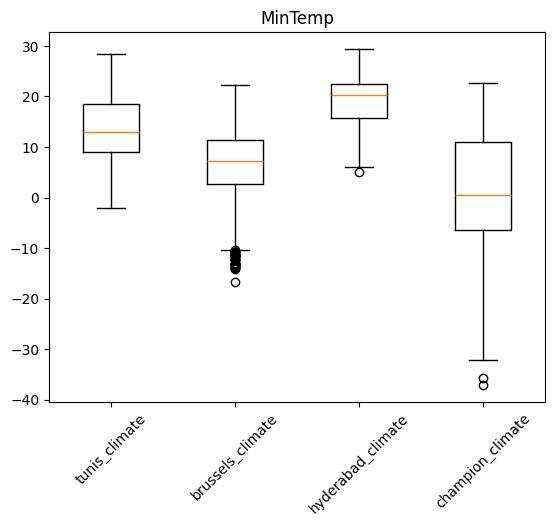

/var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/ipykernel_61670/2916370512.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=evaluator.weather_names)


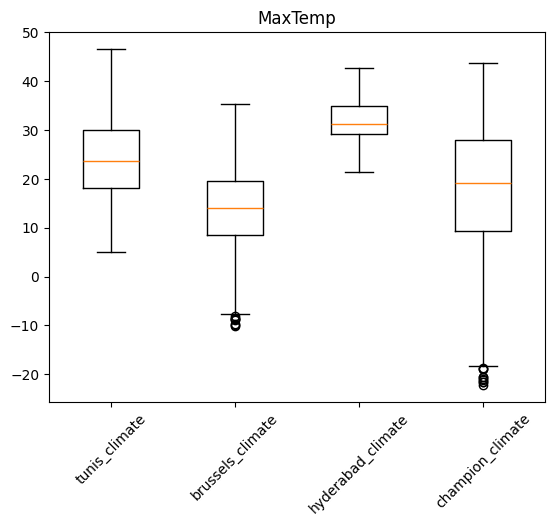

/var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/ipykernel_61670/2916370512.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=evaluator.weather_names)


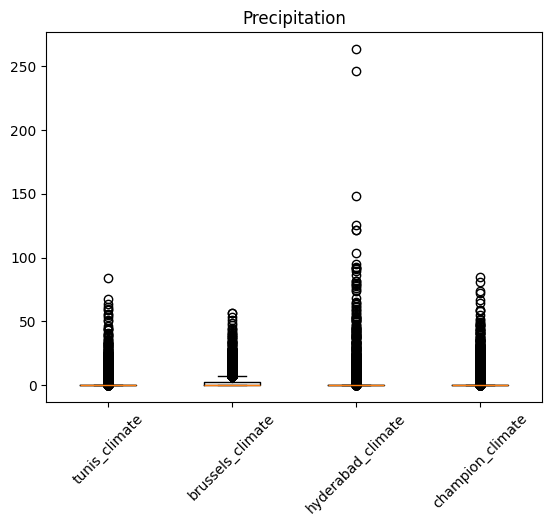

/var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/ipykernel_61670/2916370512.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=evaluator.weather_names)


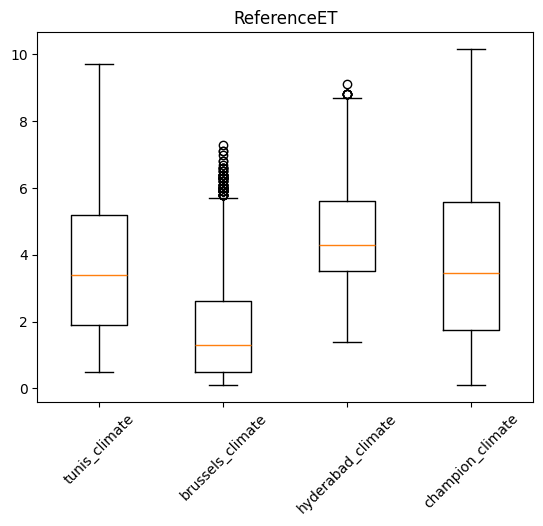

In [26]:
country_dfs = []
for weather_name in evaluator.weather_names:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        weather_path = get_filepath(f"{weather_name}.txt")
        country_df = prepare_weather(weather_path)
        country_dfs.append(country_df)

for context_col in evaluator.context_cols:
    boxplot_data = [country_df[context_col] for country_df in country_dfs]
    plt.boxplot(boxplot_data, labels=evaluator.weather_names)
    plt.title(context_col)
    plt.xticks(rotation=45)
    plt.show()

## Evolution Analysis

In [27]:
final_gen_df = pd.read_csv(results_dir / f"{gens}.csv")
final_pareto = final_gen_df[final_gen_df["rank"] == 1]
final_pareto

,cand_id,parents,rank,distance,kcal,irr
0,50_82,"['37_14', '37_14']",1,inf,3.427379e+07,-550.465116
1,36_71,"['31_68', '31_68']",1,inf,2.046243e+07,-0.000000
2,50_3,"['49_20', '37_14']",1,0.191891,3.398774e+07,-493.430233
3,50_70,"['49_64', '49_1']",1,0.085524,2.390006e+07,-57.732558
4,50_68,"['49_70', '49_25']",1,0.057304,3.002199e+07,-195.523256
5,50_80,"['49_8', '49_3']",1,0.050112,3.344833e+07,-402.906977
6,47_79,"['46_55', '45_78']",1,0.047986,2.931733e+07,-171.802326
7,50_69,"['49_45', '49_62']",1,0.047811,3.287248e+07,-344.127907
8,50_55,"['49_81', '49_45']",1,0.046178,3.143041e+07,-223.953488
9,50_35,"['36_71', '49_25']",1,0.041461,2.274921e+07,-32.965116


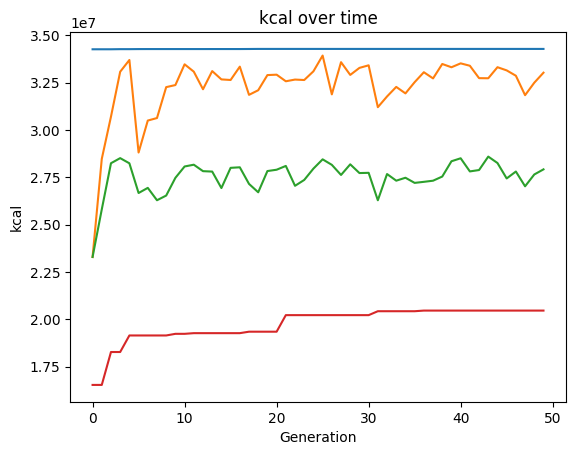

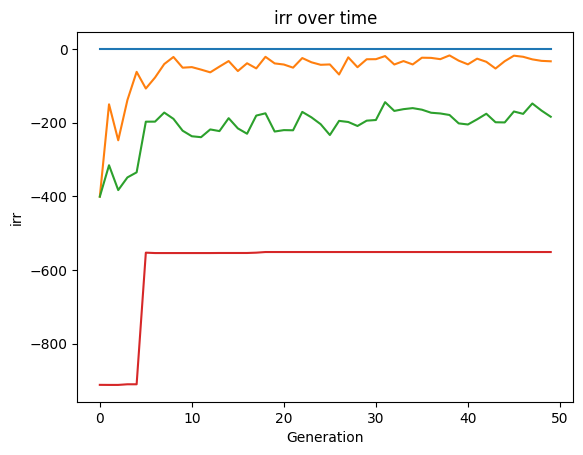

In [28]:
def plot_objective_over_time(task):
    best = []
    worst = []
    avg = []
    elite = []
    for gen in range(gens):
        gen_df = pd.read_csv(results_dir / f"{gen}.csv")
        pareto = gen_df[gen_df["rank"] == 1]
        scores = pareto[task]
        best.append(scores.max())
        worst.append(scores.min())
        avg.append(scores.mean())
        elite.append(pareto[task].nlargest(n_elites).mean())
    
    plt.plot(range(gens), best, label=f"Best {task}")
    plt.plot(range(gens), elite, label=f"Elite {task}")
    plt.plot(range(gens), avg, label=f"Avg {task}")
    plt.plot(range(gens), worst, label=f"Worst {task}")
    plt.xlabel("Generation")
    plt.ylabel(task)
    plt.title(f"{task} over time")
    plt.show()

for task in tasks:
    plot_objective_over_time(task)

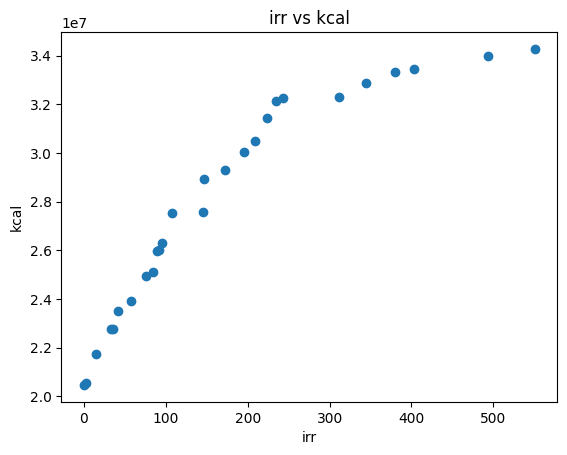

In [29]:
def plot_two_objective(outcome1, outcome2, gens, pareto=True):
    if len(gens) == 1:
        colors = ["C0"]
    else:
        colors = plt.cm.viridis_r([i / (len(gens)+1) for i in range(len(gens)+1)])
    for gen in gens:
        gen_df = pd.read_csv(results_dir / f"{gen}.csv")
        gen_df = gen_df[gen_df["rank"] == 1] if pareto else gen_df
        plt.scatter(-1 * gen_df[outcome1], gen_df[outcome2], color=colors[gens.index(gen)])

    plt.title(f"{outcome1} vs {outcome2}")
    plt.ylabel(outcome2)
    plt.xlabel(outcome1)
    plt.show()

plot_two_objective("irr", tasks[0], [gens])
# plot_two_objective("mulch", "yield")
# plot_two_objective("irr", "mulch")

## Action Analysis

In [30]:
def get_candidate_actions(candidate: Candidate, torch_weather: torch.tensor):
    with torch.no_grad():
        params = candidate.prescribe(torch_weather.unsqueeze(0))[0]
    return params

def get_candidate_from_id(results_dir: Path, cand_id: str):
    cand_path = results_dir / cand_id.split("_")[0] / f"{cand_id}.pt"
    return Candidate.from_seed(cand_path, model_params, tasks)

In [31]:
candidate = get_candidate_from_id(results_dir, "37_14")
actions = [get_candidate_actions(candidate, w) for w in torch_weathers]
yields, irrs = evaluator.evaluate_candidate(candidate)

In [32]:
for action, yie, irr in zip(actions, yields, irrs):
    print(action, yie, irr)

{'irrigation_management': {'irrigation_method': 1, 'SMT': array([62.291557, 85.40927 , 60.107082, 40.725613], dtype=float32), 'max_irr_season': 751.4164}, 'crop': {'c_name': 'Wheat', 'planting_date': '04/14'}} 32926862.96783933 825
{'irrigation_management': {'irrigation_method': 1, 'SMT': array([58.76875, 85.55454, 61.89658, 39.13593], dtype=float32), 'max_irr_season': 786.5255}, 'crop': {'c_name': 'Wheat', 'planting_date': '04/14'}} 33044114.077471435 870
{'irrigation_management': {'irrigation_method': 1, 'SMT': array([59.770893, 83.40805 , 59.86022 , 44.049477], dtype=float32), 'max_irr_season': 728.479}, 'crop': {'c_name': 'Wheat', 'planting_date': '04/18'}} 33159978.409599576 825
{'irrigation_management': {'irrigation_method': 1, 'SMT': array([63.50941 , 88.10589 , 62.350983, 42.889957], dtype=float32), 'max_irr_season': 773.0961}, 'crop': {'c_name': 'Wheat', 'planting_date': '04/09'}} 33304818.7211553 900
{'irrigation_management': {'irrigation_method': 1, 'SMT': array([58.402424, 

In [33]:
all_actions = []
for cand_id in final_pareto["cand_id"]:
    candidate = get_candidate_from_id(results_dir, cand_id)
    actions = [get_candidate_actions(candidate, w) for w in torch_weathers]
    all_actions.append(actions)

In [34]:
action_pareto = final_pareto.copy()
crop_col = []
mulch_col = []
bund_water_col = []
bund_height_col = []
for actions in all_actions:
    point_crops = set()
    avg_mulch = 0
    avg_bund_water = 0
    avg_bund_height = 0
    for action in actions:
        point_crops.add(action["crop"]["c_name"])
        # avg_mulch += action["field_management"]["mulch_pct"]
        # avg_bund_water += action["field_management"]["bund_water"]
        # avg_bund_height += action["field_management"]["z_bund"]
    avg_mulch /= len(actions)
    avg_bund_water /= len(actions)
    avg_bund_height /= len(actions)
    point_crops = sorted(list(point_crops))
    crop_str = ",".join(point_crops)
    crop_col.append(crop_str)
    mulch_col.append(avg_mulch)
    bund_water_col.append(avg_bund_water)
    bund_height_col.append(avg_bund_height)
action_pareto["crops"] = crop_col
action_pareto["mulch"] = mulch_col
action_pareto["bund_water"] = bund_water_col
action_pareto["bund_height"] = bund_height_col

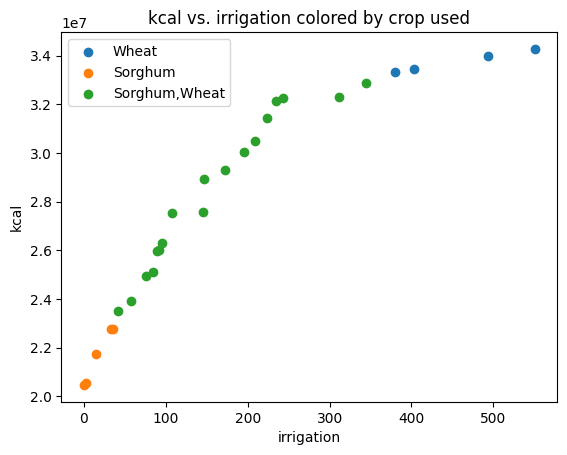

In [35]:
for action_crop in action_pareto["crops"].unique():
    subset = action_pareto[action_pareto["crops"] == action_crop]
    plt.scatter(-1 * subset["irr"], subset[tasks[0]], label=action_crop)
plt.legend()
plt.xlabel("irrigation")
plt.ylabel(tasks[0])
plt.title(f"{tasks[0]} vs. irrigation colored by crop used")
plt.show()

In [36]:
# Get all crops used in each generations
def get_crop_generation(results_dir, gen, pareto=False):
    gen_df = pd.read_csv(results_dir / f"{gen}.csv")
    if pareto:
        gen_df = gen_df[gen_df["rank"] == 1]
    gen_crops = set()
    for cand_id in gen_df["cand_id"]:
        cand = get_candidate_from_id(results_dir, cand_id)
        actions = [get_candidate_actions(cand, w) for w in torch_weathers]
        for action in actions:
            gen_crops.add(action["crop"]["c_name"])
    print(gen, gen_crops)

for gen in range(gens+1):
    get_crop_generation(results_dir, gen, pareto=True)

0 {'Quinoa', 'Sorghum', 'Wheat', 'Soybean'}
1 {'Quinoa', 'Tef', 'Sorghum', 'Wheat', 'Soybean'}
2 {'Quinoa', 'Sorghum', 'PaddyRice', 'Wheat'}
3 {'Barley', 'Quinoa', 'Sorghum', 'Wheat'}
4 {'Quinoa', 'Tef', 'Barley', 'Sorghum', 'Wheat', 'DryBean'}
5 {'Quinoa', 'Potato', 'Sorghum', 'Wheat', 'DryBean'}
6 {'Quinoa', 'Tomato', 'Sorghum', 'Wheat', 'DryBean'}
7 {'Quinoa', 'Sorghum', 'PaddyRice', 'Wheat', 'DryBean'}
8 {'Quinoa', 'Sorghum', 'PaddyRice', 'Wheat', 'DryBean'}
9 {'Quinoa', 'Sorghum', 'Wheat'}
10 {'Quinoa', 'Tomato', 'Tef', 'Barley', 'Sorghum', 'Wheat'}
11 {'Quinoa', 'Tef', 'Barley', 'Sorghum', 'Wheat', 'DryBean'}
12 {'Quinoa', 'Sorghum', 'Wheat', 'Tef'}
13 {'Quinoa', 'Sorghum', 'Wheat', 'Tef'}
14 {'Quinoa', 'Barley', 'Potato', 'Sorghum', 'Wheat'}
15 {'Quinoa', 'Tomato', 'Barley', 'Sorghum', 'Wheat'}
16 {'Barley', 'Sorghum', 'Wheat'}
17 {'Barley', 'Sorghum', 'Wheat'}
18 {'Sorghum', 'PaddyRice', 'Wheat'}
19 {'Sorghum', 'PaddyRice', 'Wheat'}
20 {'Sorghum', 'PaddyRice', 'Wheat'}
21 {'Sor

## 3 Objective

KeyError: 'mulch'

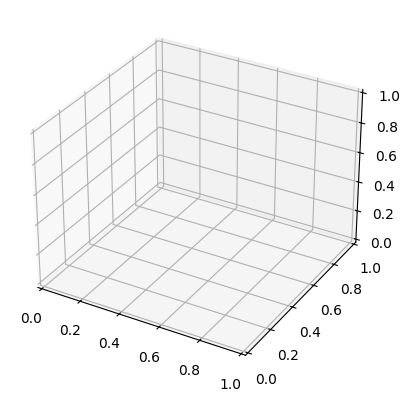

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(final_pareto[tasks[0]], -1 * final_pareto["irr"], -1 * final_pareto["mulch"])
ax.set_xlabel(tasks[0])
ax.set_ylabel("Irrigation")
ax.set_zlabel("Mulch")
plt.show()

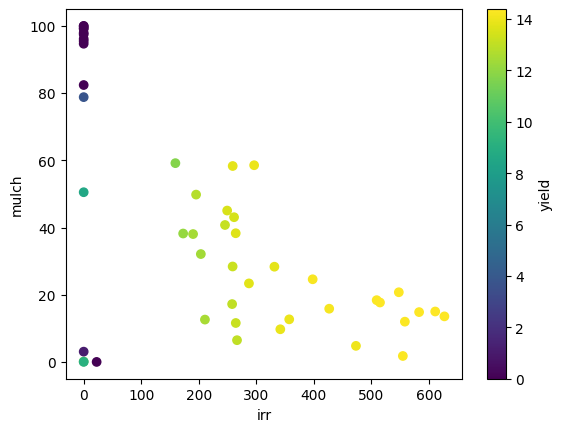

In [ ]:
scatter = plt.scatter(-1 * final_pareto["irr"], -1 * final_pareto["mulch"], c=final_pareto["yield"])
plt.xlabel("irr")
plt.ylabel("mulch")
plt.colorbar(scatter).set_label("yield")
plt.show()

In [ ]:
import numpy as np
from evolution.evaluation.evaluator import Evaluator
import warnings
from scipy.optimize import fmin

INFO:root:Running the simulation in development mode.
INFO:root:clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/964840/anaconda3/envs/aquacrop/include -arch arm64 -fPIC -O2 -isystem /Users/964840/anaconda3/envs/aquacrop/include -arch arm64 -c /var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/tmpiwyxoa7y/temp.c -o /var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/tmpiwyxoa7y/temp.o
INFO:root:clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/964840/anaconda3/envs/aquacrop/include -arch arm64 -fPIC -O2 -isystem /Users/964840/anaconda3/envs/aquacrop/include -arch arm64 -c /var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/tmplzfok20l/temp.cxx -o /var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/tmplzfok20l/temp.o


In [ ]:
def evaluate(x, max_irr_season, evaluator, weather_df):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        results = evaluator.run_model(weather_df, x, max_irr_season)
    reward = -1 * results["Dry yield (tonne/ha)"].mean()
    return reward

In [ ]:
def get_starting_point(num_smts, max_irr_season, num_searches, evaluator, weather_df):
    """
    find good starting threshold(s) for optimization
    """

    # get random SMT's
    x0list = np.random.rand(num_searches,num_smts)*100
    rlist=[]
    # evaluate random SMT's
    for xtest in x0list:
        reward = evaluate(xtest, max_irr_season, evaluator, weather_df)
        rlist.append(reward)

    # save best SMT
    x0=x0list[np.argmin(rlist)]
    
    return x0

evaluator = Evaluator()

In [ ]:
def optimize(num_smts, max_irr_season, evaluator, num_searches, weather_df):
    """ 
    optimize thresholds to be profit maximising
    """
    # get starting optimization strategy
    x0=get_starting_point(num_smts, max_irr_season, num_searches, evaluator, weather_df)
    # run optimization 
    res = fmin(evaluate, x0, disp=0, args=(max_irr_season, evaluator, weather_df))
    # reshape array
    smts= res.squeeze()
    # evaluate optimal strategy
    return smts

100%|██████████| 11/11 [00:47<00:00,  4.29s/it]


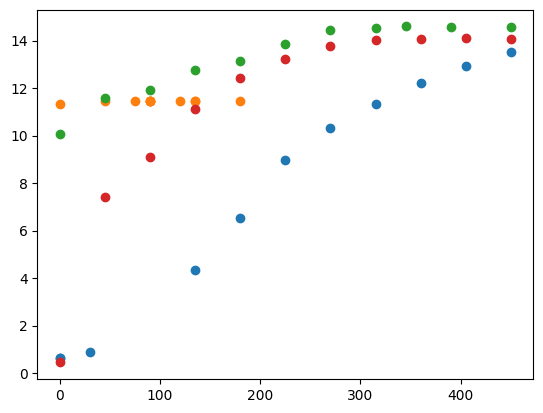

In [ ]:
cities = ["tunis_climate", "brussels_climate", "hyderabad_climate", "champion_climate"]
weather_dfs, _ = evaluator.load_data(cities)
all_yields = []
all_irrs = []
for weather_df, city in zip(weather_dfs, cities):
    yields = []
    irrs = []
    points = 10
    for i in tqdm(range(points+1)):
        max_irr_season = i * (450/points)
        smts = optimize(4, max_irr_season, evaluator, 10, weather_df)
        results = evaluator.run_model(weather_df, smts, max_irr_season)
        dry_yield = results["Dry yield (tonne/ha)"].mean()
        irr = results["Seasonal irrigation (mm)"].mean()
        yields.append(dry_yield)
        irrs.append(irr)
    plt.scatter(irrs, yields, label=city)
    all_yields.append(yields)
    all_irrs.append(irrs)

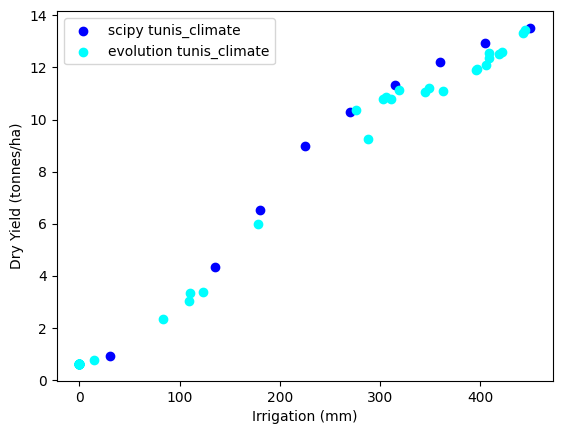

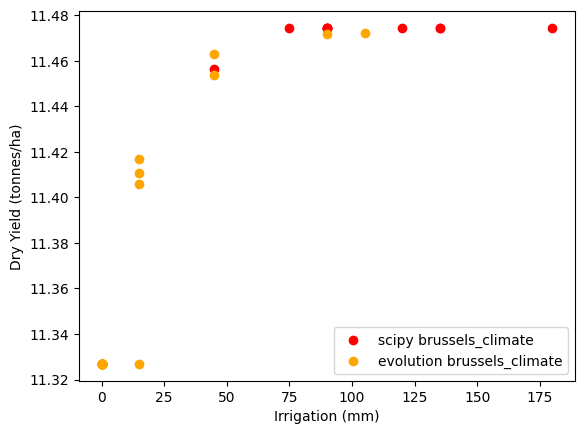

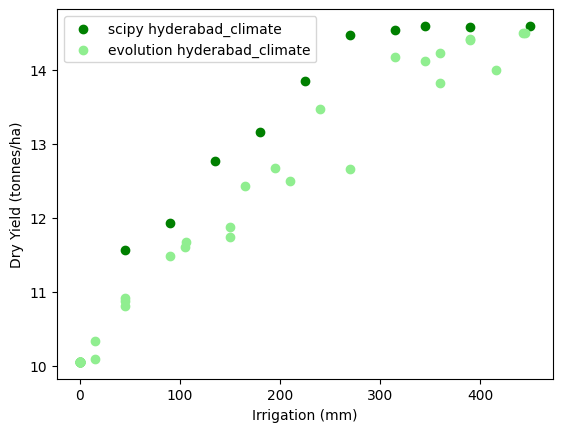

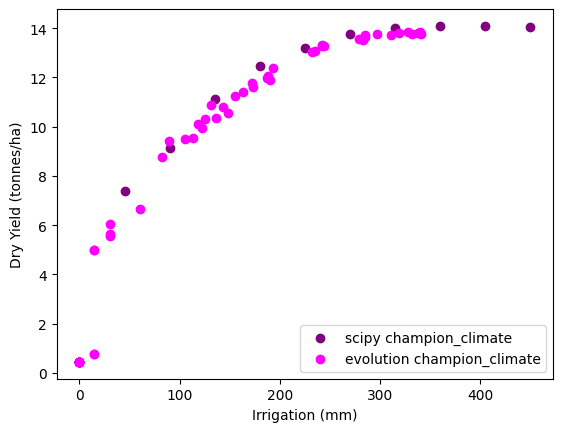

In [ ]:
scipy_colors = ["blue", "red", "green", "purple"]
evo_colors = ["cyan", "orange", "lightgreen", "magenta"]
for i in range(len(cities)):
    plt.scatter(all_irrs[i], all_yields[i], label=f"scipy {cities[i]}", color=scipy_colors[i])
    plt.scatter(final_pareto[f"irr_{i}"], final_pareto[f"yield_{i}"], label=f"evolution {cities[i]}", color=evo_colors[i])
    plt.legend()
    plt.xlabel("Irrigation (mm)")
    plt.ylabel("Dry Yield (tonnes/ha)")
    plt.show()
# plt.show()

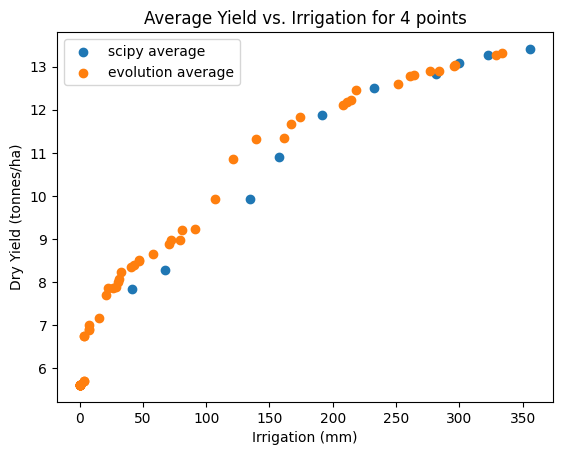

In [ ]:
scipy_average_yields = np.mean(np.array(all_yields), axis=0)
scipy_average_irrs = np.mean(np.array(all_irrs), axis=0)
plt.scatter(scipy_average_irrs, scipy_average_yields, label="scipy average")
plt.scatter(-1 * final_pareto["irrigation"], final_pareto["yield"], label="evolution average")
plt.legend()
plt.title("Average Yield vs. Irrigation for 4 points")
plt.xlabel("Irrigation (mm)")
plt.ylabel("Dry Yield (tonnes/ha)")
plt.show()

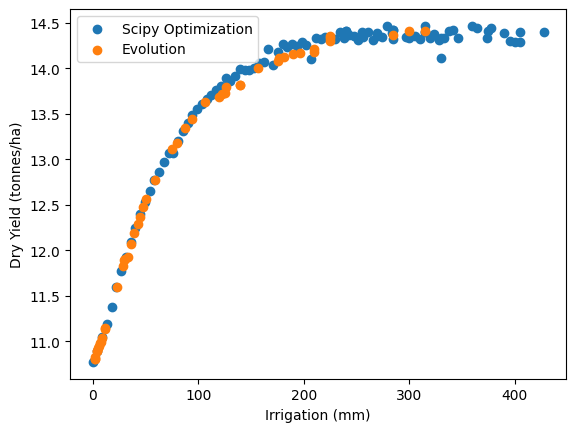

In [ ]:
plt.scatter(irrs, yields, label="Scipy Optimization")
plt.scatter(-1 * final_pareto["irrigation"], final_pareto["yield"], label="Evolution")
plt.legend()
plt.xlabel("Irrigation (mm)")
plt.ylabel("Dry Yield (tonnes/ha)")
plt.show()